# Greedy Alogrithm
: 연속적인 부분해 선택이 필요한 문제가 주어졌을 때, 선택을 해야 할 순간마다 그 순간에 최적이라고 생각되는 것을 부분해로 선택함으로써 최종해를 도출하는 알고리즘
- 최종 해가 최적이라는 보장이 없으므로 최적인지 이론적으로 검증해야함
- heuristic 알고리즘


## 탐욕적 알고리즘 설계 과정
1. Selection Procedure : 현재 가장 최적이라 생각되는 부분 해 선택
2. Feasibility check : 선택한 부분 해를 해 집합에 포함시키는 것이 적절한지 확인 후 포함
3. Solution Check : 새로 얻은 해 집합이 주어진 문제의 최종 해인지 확인

<br>

## 👉 거스름돈 계산하기 문제 
**:  항상 최적인 최종 해를 도출할 수 없음**
1. Selection Procedure : 현재 선택할 수 있는 동전 중 액면가가 가장 높은 동전을 부분해로 선택
- 부분 해 선택 기준의 타당 여부를 보이기 위한 방법 중 하나는 반례를 찾는 것 
2. Feasibility check : 해당 동전을 거스름돈에 추가 시 거스름돈 총액 초과하였는지 확인 
3. Solution Check : 현재까지의 금액이 거스름돈 총액에 도달했는지 확인

In [ ]:
def coin_change(x):
  d = [10,50,100,500,1000,5000,10000]
  result = []
  i = len(d) - 1

  while i >= 0 :
    cnt = 0
    while x >= d[i] :
      x -= d[i]
      cnt += 1
    i -= 1
    result.append(cnt)

  for cnt, coin in zip(result, d[::-1]) :
    print(coin, "원 :", cnt, "개")

coin_change(16680)

10000 원 : 1 개
5000 원 : 1 개
1000 원 : 1 개
500 원 : 1 개
100 원 : 1 개
50 원 : 1 개
10 원 : 3 개


## 👉 작업 스케줄링 문제  
**:  항상 최적인 최종 해 도출  o(nlogn)**
1. Selection Procedure : 해당 순간에 종료 시간이 가장 이른 작업을 우선적으로 선택 
2. Feasibility check : 이전에 선택한 작업과 서로 시간이 겹치는지 확인
3. Solution Check : 주어진 모든 작업을 확인했는지 점검


##✔️ Proof
- Greedy Algorithm을 이용하여 도출한 최종 해 G = {g1, g2, ..., gk}
- 최적인 최종 해 O = {o1, o2, ..., om}
- 여기서 1, 2, 3, ..., k와 1, 2, 3, ..., m은 빠른 종료 시간 순서를 나타냄


    만약 g1과 o1이 같지 않다면 g1은 반드시 o1보다 종료시간이 더 빠른 작업이다. 
    그 이유는 입력으로 주어진 작업 집합 JOB을 종료 시간 기준으로 오름차순으로 정렬했기 때문이다.
    따라서, o1을 g1으로 대체할 수 있으며, 그 결과 O와는 다른 새로운 최적인 최종 해 O' = {g1, o2, ..., om}이 된다. 
    이를 반복하면 O = G와 같게 된다.


In [ ]:
def job_scheduling(JOB):
  JOB.sort(key = lambda x : x[2]) # o(nlogn)

  solution_set = []
  previous_f = 0

  for i in range(len(JOB)): # o(logn)
    if JOB[i][1] >= previous_f :
      solution_set.append(JOB[i])
      previous_f = JOB[i][2]
  
  return solution_set

JOB = [['A', 0, 6], ['B', 1, 4], ['C', 3, 5], ['D', 3, 8], ['E', 4, 7], ['F', 5, 9], ['G', 6, 10], ['H', 8, 11]]
print(job_scheduling(JOB))

[['B', 1, 4], ['E', 4, 7], ['H', 8, 11]]


## 👉 강의실 배정 문제 
**:  항상 최적인 최종 해 도출  o(nlogn)**
1. Selection Procedure : 해당 순간에  시작 시간이 가장 이른 강의 선택
2. Feasibility check : 현재 사용 중인 강의실을 이미 이전에 배정된 강의와 서로 시간이 겹치는지 확인
3. Solution Check : 주어진 모든 강의를 배정했는지 점검

In [ ]:
class Binaryminheap :
    def __init__(self, array=[]): # o(1)
        self.items = array

    def size(self): # o(1)
        return len(self.items)

    def swap(self, i, j): # o(1)
        self.items[i], self.items[j] = self.items[j], self.items[i]

    def insert(self,key): # o(log n) : 최악의 경우 힙의 높이 h = 올림log(n+1)-1 만큼 upheap
        self.items.append(key)
        self.upheap(self.size()-1)

    def extract_min(self): # o(log n) : 최악의 경우 힙의 높이 h = 올림log(n+1)-1 만큼 downheap
        if self.size() == 0:
            print("heap is empty")
            return None
        minimum = self.items[0]
        self.swap(0,-1)
        del self.items[-1]
        self.downheap(0)
        return minimum

    def downheap(self, i):
        while 2*i + 1 <= self.size()-1:
            k = 2*i+1
            if k < self.size()-1 and self.items[k] >= self.items[k+1]:
                k += 1
            if self.items[i] < self.items[k]:
                break
            self.swap(i, k)
            i = k

    def upheap(self, i):
        while i > 0 and self.items[(i-1//2)] < self.items[i]:
            self.swap(i, (i-1)//2)
            i = (i-1) // 2

    def print_heap(self):
        print("class = ",classes)
        print("num of classrooms = ", self.size())

In [ ]:
if __name__ == '__main__':
  # classes = [(900, 1030),(1100, 1400), (900,1230),(1500,1630), (900,1030), (1100,1230),  (1300,1430), (1300,1430), (1400,1630),  (1500,1630)]
  classes = [(900, 1300), (900,1330), (1300,1700), (1400,1630)]
  classes = sorted(classes, key=lambda x: x[0])
  
  minheap = Binaryminheap()
  for c in classes : # o(n)
    if minheap.size() != 0 and minheap.items[0] <= c[0] :
      min = minheap.extract_min() # o(logn)
    minheap.insert(c[1]) # o(logn)
  minheap.print_heap()

class =  [(900, 1300), (900, 1330), (1300, 1700), (1400, 1630)]
num of classrooms =  2


# 최단 경로 문제 
: 가중치 그래프에서 시작 정점으로부터 도착 정점까지의 최단 경로( 가중치의 합이 최소가 되는 경로)를 찾는 문제

## 👉 다익스트라 알고리즘( Dijkstra's Algortihm )
: 주어진 무방향 가중치 그래프에서 특정 시작 정점에서 다른 모든 정점까지의 최단 단순 경로를 찾는 문제를 해결하기 위한 Greedy Algorithm
- 단, 가중치는 음수가 아니어야 함


🧐 무방향 가중치 그래프 간선의 가중치를 모두 1씩 증가시키면 최단 단순 경로가 바뀔까? ⭕️

<br>

**:  항상 최적인 최종 해 도출**

- 정점들의 집합 : V, 간선들의 집합 : E, 시작 정점 : s
- 집합 S : 시작 정점 s로부터 최종 쵠단 경로가 이미 발견된 정점들의 집합으로 S = {s}로 초기화
- 최단 거리 기록 리스트 D = {dist(s,s), dist(s,u1), ..., dist(s,uV)} : S에 존재하는 정점만을 거쳐서 다른 정점에 이른 최단거리를 기록하는 리스트 
  - D[s] = 0
  - s를 제외한 각 정점 u에 대해서 (s,u)가 존재하면 D(u)는 간선의 가중치로 초기화하며, 존재하지 않으면 무한대로 초기화한다.  

1. Selection Procedure : 해당 순간에 정점 s로부터 최단경로가 되는 정점 v 선정
2. Feasibility check : V - S에 속한 정점 중에서 최단 경로에 있는 v를 S에 포함시키고, V - {v}에 속한 정점 u에 대한 dist(s,u) 갱신(= edge relaxation)시킴
3. Solution Check : S = V 인지 점검

<br>

## ✔️ Proof

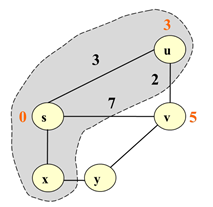

- 특정 시점에서 집합 S에 v가 새로 추가될 차례라고 가정
- S에 이미 속해 있던 정점 u와 v를 연결하는 간선 e1=(u,v)가 존재함
- 이때, dist(s,u)+dist(u,v)가 s로부터 v까지의 최소 거리가 됨을 증명하면 됨 

      dist(s,u)+dist(u,v)보다 가까운 s로부터 v까지의 경로 P가 존재한다고 가정
      P에는 반드시 S에 포함된 정점 x와 포함되지 않은 정점 y를 연결하는 간선 e2=(x,y)가 존재함
      s로부터 v까지의 최소 거리는 dist(s,u)+dist(u,v)보다 가까우므로 dist(s,x)+dist(x,y) < dist(s,u)+dist(u,v)를 만족하고, 그 결과 dist(s,y) < dist(s,v)를 만족함
      하지만, 다익스트라 알고리즘은 각 단계마다 choose_min_vertex() 함수를 호출하여 S에 추가되지 않은 정점 중 s와의 거리가 최소인 정점을 선택하므로 모순이다.
      따라서, dist(s,u)+dist(u,v)보다 가까운 s로부터 v까지의 경로 P는 존재하지 않음

### method 1 : O(V^2)

In [ ]:
def choose_min_vertex(dist, found):
  min = INF
  minpos = -1
  for i in range(len(dist)) :
    if dist[i] < min and found[i] == False : 
      min = dist[i]
      minpos = i
  return minpos

def dijkstra(vtx, adj, start) : 
  vsize = len(vtx)
  dist = list(adj[start])
  path = [start] * vsize
  found = [False] * vsize
  found[start] = True
  dist[start] = 0 

  for i in range(vsize) :
    u = choose_min_vertex(dist, found)
    found[u] = True
    for w in range(vsize) :
      if not found[w] :
        if dist[u] + adj[u][w] < dist[w] : 
          dist[w] = dist[u] + adj[u][w]
          path[w] = u
  
  return path

INF = float('inf')
vertex = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
adj_matrix = [ [0, 3, 7, 5, INF, INF, INF],
               [3, 0, 2, INF, 9, INF, INF], 
               [7, 2, 0, 1, 6, 12, 25],
               [5, INF, 1, 0, INF, INF, 20],
               [INF, 9, 6, INF, 0, 4,INF],
               [INF, INF, 12, INF, 4, 0, 8],
               [INF, INF, 25, 20, INF, 8, 0] ]

print("Shortest Path by Dijkstra's Algorithm \n")
start = 0
path = dijkstra(vertex, adj_matrix, start)

for end in range(len(vertex)) :
  if end != start :
    print("[Shortest Path %s -> %s] : %s" %(vertex[start], vertex[end], vertex[end]), end = ' ')
    while path[end] != start : 
      print("<-", vertex[path[end]], end = ' ')
      end = path[end]
    print("<-", vertex[path[end]])

Shortest Path by Dijkstra's Algorithm 

[Shortest Path A -> B] : B <- A
[Shortest Path A -> C] : C <- B <- A
[Shortest Path A -> D] : D <- A
[Shortest Path A -> E] : E <- C <- B <- A
[Shortest Path A -> F] : F <- E <- C <- B <- A
[Shortest Path A -> G] : G <- F <- E <- C <- B <- A


### method 2 : O((V+E)log V)

In [ ]:
import heapq  # 우선순위 큐 구현을 위함

def dijkstra(graph, start):
  distances = {node: float('inf') for node in graph}  # start로 부터의 거리 값을 저장하기 위함
  distances[start] = 0  # 시작 값은 0이어야 함
  queue = []
  heapq.heappush(queue, [distances[start], start])  # 시작 노드부터 탐색 시작 하기 위함.

  while queue:  # queue에 남아 있는 노드가 없으면 끝
    current_distance, current_destination = heapq.heappop(queue)  # 탐색 할 노드, 거리를 가져옴.

    if distances[current_destination] < current_distance:  # 기존에 있는 거리보다 길다면, 볼 필요도 없음
      continue
    
    for new_destination, new_distance in graph[current_destination].items():
      distance = current_distance + new_distance  # 해당 노드를 거쳐 갈 때 거리
      if distance < distances[new_destination]:  # 알고 있는 거리 보다 작으면 갱신
        distances[new_destination] = distance
        heapq.heappush(queue, [distance, new_destination])  # 다음 인접 거리를 계산 하기 위해 큐에 삽입
    
  return distances

graph = {
    'A': {'B': 8, 'C': 1, 'D': 2},
    'B': {},
    'C': {'B': 5, 'D': 2},
    'D': {'E': 3, 'F': 5},
    'E': {'F': 1},
    'F': {'A': 5}
}
print(dijkstra(graph, 'A'))

{'A': 0, 'B': 6, 'C': 1, 'D': 2, 'E': 5, 'F': 6}
